# GITHUB BUGS PREDICTION
(https://www.linkedin.com/in/seanlachhander/) - December 2020

This notebook simplifies the steps to solve github bug predition through a typical workflow using BERT base uncased model. Before we get started with the workflow , the first question that comes into our mind is how do we get started. Well we will get there but let's first understand what exactly the problem statement is and what is expected here?

# BERT

* ###  What is BERT?

BERT is the first deeply bidirectional, unsupervised language representation, pre-trained using only a plain text corpus (in this case, Wikipedia).

* ### What Makes BERT Different?

BERT builds upon recent work in pre-training contextual representations — including Semi-supervised Sequence Learning, Generative Pre-Training, ELMo, and ULMFit. However, unlike these previous models, BERT is the first deeply bidirectional, unsupervised language representation, pre-trained using only a plain text corpus (in this case, Wikipedia).

* ### Why does pretrained language models makes a difference?

Pre-trained representations can either be **context-free** or **contextual**, and contextual representations can further be unidirectional or bidirectional. 

* Context-free models such as word2vec or GloVe generate a single word embedding representation for each word in the vocabulary. For example, the word “bank” would have the same context-free representation in “bank account” and “bank of the river.” 

* Contextual models instead generate a representation of each word that is based on the other words in the sentence. For example, in the sentence “I accessed the bank account,” a unidirectional contextual model would represent “bank” based on “I accessed the” but not “account.” 

However, BERT represents “bank” using both its previous and next context — “I accessed the ... account” — starting from the very bottom of a deep neural network, making it deeply bidirectional.

Read more about Basic BERT [here](http://https://arxiv.org/pdf/1810.04805.pdf).

In this Notebook we will be using BERT Base Uncased, from [Hugging Face Library](http://https://huggingface.co/bert-base-uncased). 
________________________________________
**Model: bert-base-uncased**

*        12-layer, 768-hidden, 12-heads, 110M parameters.

*        Trained on lower-cased English text.

```
@article{DBLP:journals/corr/abs-1810-04805,
  author    = {Jacob Devlin and
               Ming{-}Wei Chang and
               Kenton Lee and
               Kristina Toutanova},
  title     = {{BERT:} Pre-training of Deep Bidirectional Transformers for Language
               Understanding},
  journal   = {CoRR},
  volume    = {abs/1810.04805},
  year      = {2018},
  url       = {http://arxiv.org/abs/1810.04805},
  archivePrefix = {arXiv},
  eprint    = {1810.04805},
  timestamp = {Tue, 30 Oct 2018 20:39:56 +0100},
  biburl    = {https://dblp.org/rec/journals/corr/abs-1810-04805.bib},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}
```

## **Problem Statement:**

 [MachineHack](http://https://www.machinehack.com/) a Biggest Machine Learning Community For Data Science & AI Enthusiastshas comeup with one of the popular Hackathon on GitHub bugs prediction. 
 
Detecting defects in software systems is an evergreen topic, since there is no real world software without bugs. There are many algorithms that has come up recently to help developers find bugs in software. The challenges of having curated datasets for own domain specific software , or code relates bug finding is rare. [research paper](http://https://www.researchgate.net/publication/304664263_A_Public_Bug_Database_of_GitHub_Projects_and_Its_Application_in_Bug_Prediction) for gaining more ideas on Bug Prediction Databases and related algorithms that can be used.

In this Hackathon proposed by Machinehack , we need to come up with an algorithm that can predict the bugs, features, and questions based on GitHub titles and the text body. 


The Dataset has three columns Title, Body and Label: 

*     **-Title** - the title of the GitHub bug, feature question

*     **-Body** - the body of the GitHub bug, feature question

*     **-Label** - Represents various classes of Labels

Once we clean up the dataset [embold_train.json, embold_test.json] and make it ready for the model we need feed the data to a specifc model (Here we using BERT base uncased as pretrained model to predict the expected outcome )


    Bug - 0
    Feature - 1
    Question - 2





# Workflow

1. Problem Statement.
1. Geting Started.
1. Train and Test data 
1. Analyze, identify patterns, and explore the data.
1. Model, predict and solve the problem.
1. Visualize, report, and present the problem solving steps and final solution.
1. Supply or submit the results.

# **Getting Started**

## **Importing the essential libraries**


Importing the required libraries at the begining of your notebook helps you run your code seemless . We frequenly get interrupted by the missing library errors or any other imports which can be avoided by importing them early.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import torch
import pandas as pd
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torch.optim import lr_scheduler
from sklearn import model_selection
from sklearn import metrics
import transformers
import tokenizers
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from tqdm.autonotebook import tqdm
from tokenizers import BertWordPieceTokenizer
import matplotlib.pyplot as plt
import torch.nn as nn
import seaborn as sns
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader


import warnings
warnings.filterwarnings('ignore')

## Load The Dataset

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Create the dataframe

In [3]:
data_frame = pd.read_json("/Users/lachhans/Downloads/Github_Bug_Dataset/embold_train.json")

# **Data Set**

Currently the title and body is in separate fields. We will combine the title and body to keep them into a single field called text:

### Train Set

In [4]:
train_df= pd.read_json("/Users/lachhans/Downloads/Github_Bug_Dataset/embold_train.json").reset_index(drop=True)
train_df.head()

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


### Test Set

In [5]:
test_df= pd.read_json("/Users/lachhans/Downloads/Github_Bug_Dataset/embold_test.json").reset_index(drop=True)
test_df.head()

,title,body
0,config question path-specific environment var...,issue description or question\r \r hey @artemg...
1,crash indien vol,de simulator crasht als hij vol zit
2,unable to mine rocks,"sarkasmo starting today, when i hit enter act..."
3,not all whitelists are processed,create following rules... order of creation is...
4,add ctx menu for idafree 70 and idafree 5,"associated with .dll, .dll_, .exe, .exe_, .sc,..."


In [6]:
train_ex_df= pd.read_json("/Users/lachhans/Downloads/Github_Bug_Dataset/embold_train_extra.json").reset_index(drop=True)
train_ex_df.head()

,title,body,label
0,use a 8bit typeface,since this is meant to emulate some old arcade...,1
1,implement wireless m-bus binding,_from chris.pa...@googlemail.com https://cod...,1
2,add multilang support for timeago.js,currently it is only en . \r required to add ...,1
3,scaleway - seg-fault on shutdown,tbr irc creates a new scaleway instance with...,0
4,sistema de pintura: no se guardar los nuevos p...,este sp ya estaba asignado a un carro y se enc...,0


Looks like both the train and train extra dataframe contains the same content so let's combine them using concatenation command of pandas on index axis

### Checking the Length of Each Data Frame

In [7]:
def dataset_length_check(data_frame):
    print(len(data_frame),data_frame.index.shape[-1])
                 
dataset_length_check(train_df)
dataset_length_check(train_ex_df)
dataset_length_check(test_df)


150000 150000
300000 300000
30000 30000


In [8]:
train_df = pd.concat([train_df,train_ex_df],ignore_index=True)
train_df.head()

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


If we look at the label field , it is basically divided into three segments as we mentioned earlier:
* Bug - 0
* Feature - 1
* Question - 2

Let's categorize the data fields based on their labels as **df_bug** for all the bugs labeled from the dataset. Similarly we do it for features as **df_feature**  and question as **df_question** respectively.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   450000 non-null  object
 1   body    450000 non-null  object
 2   label   450000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


Total Counts of label column: 
 1    207318
0    200481
2     42201
Name: label, dtype: int64


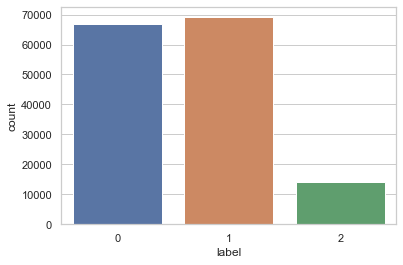

In [10]:
print('Total Counts of label column: \n'.format(),train_df['label'].value_counts())
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='label', data=data_frame)

In [11]:
df_bug = train_df[train_df['label']==0]
df_feature = train_df[train_df['label']==1]
df_question = train_df[train_df['label']==2]

In [12]:
label_counts = train_df.label.value_counts().sort_index()
label_counts

0    200481
1    207318
2     42201
Name: label, dtype: int64

In [13]:
def fx(x):
    return x['title'] + " " + x['body']   
train_df['text']= train_df.apply(lambda x : fx(x),axis=1)
test_df['text']= train_df.apply(lambda x : fx(x),axis=1)

In [14]:
train_df = train_df.reindex(columns=["title", "body", "text","label"])

In [15]:
train_df[:5]

,title,body,text,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,y-zoom piano roll a y-zoom on the piano roll w...,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,buggy behavior in selection ! screenshot from ...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...","auto update feature hi,\r \r great job so far,...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,filter out noisy endpoints in logs i think we ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,enable pid on / pid off alarm actions for ardu...,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val =\
    train_test_split(train_df.text, train_df.label, test_size=0.1, random_state=2020)

# Count the Lables :  Bug, Feature and Questions

NameError: name 'X' is not defined

In [18]:
print('Number of datapoints with label as Bug :',label_counts[0])
print('Number of datapoints with label as Feature :',label_counts[1])
print('Number of datapoints with label as Question :',label_counts[2])

Number of datapoints with label as Bug : 200481
Number of datapoints with label as Feature : 207318
Number of datapoints with label as Question : 42201


In [19]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


Let's ensure we make text lowercase, remove text in square brackets, remove links, remove punctuation and remove words containing numbers.

# Sanitize the Text Field

In [125]:
import nltk
import re
import string
from nltk.corpus import stopwords


def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers'''
    text = text.lower()
    text = text.replace('\\r', '')
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [126]:
from string import punctuation
from nltk.corpus import stopwords

def remove_stopwords(git_text):
    remove_punctuation = [ch for ch in git_text if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_git_text = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_git_text

In [127]:
from collections import Counter
import plotly.express as px

def visulize_dataset(data_frame, category):
    
    # Let's apply the above two functions 'clean_text' and 'remove_stopwords' to the whole dataset

    data_frame['text'] = data_frame['text'].apply(lambda x: x.replace("\\r", ""))
    data_frame['text'] = data_frame['text'].apply(lambda x: clean_text(x))
    data_frame["text"] = data_frame["text"].apply(remove_stopwords)
    
    
    word_list = []
    
    for i, j in data_frame.iterrows():
        for word in j['text']:
            word_list.append(word)
        
    count_dict = Counter(word_list)
    most_common_words_df = pd.DataFrame(count_dict.most_common(20), columns=['word', 'count'])
    fig = px.histogram(most_common_words_df,
                       x='word', 
                       y='count',
                       title='Most common terms used while refering to a GitHub {}'.format(category),
                       color_discrete_sequence=['#843B62'] )
    fig.show()

In [26]:
'''
In information retrieval, TF-IDF, short for term frequency–inverse document frequency, 
is a numerical statistic that is intended to reflect how important a word is to a document 
in a collection or corpus. We will use TF-IDF to vectorize our text data before feeding them 
to machine learning algorithms.
'''

from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([clean_text(text) for text in X_train])
X_val_preprocessed = np.array([clean_text(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

In [27]:
'''
Train Naive Bayes Classifier
We will use cross-validation and AUC score to tune hyperparameters of our model. 
The function get_auc_CV will return the average AUC score from cross-validation.
'''

from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()


In [28]:
from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

ValueError: multiclass format is not supported

In [29]:
# Evaluation ov Validation Set
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [45]:
# Compute predicted probabilities
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict(X_val_tfidf)

# Evaluate the classifier
#evaluate_roc(probs, y_val)
multilabel_confusion_matrix(probs, y_val)
classification_report(y_val, probs,output_dict=True)

{'0': {'precision': 0.734573368762917,
  'recall': 0.8655203260113309,
  'f1-score': 0.7946886906527344,
  'support': 20122},
 '1': {'precision': 0.7733784228077591,
  'recall': 0.7999417022930432,
  'f1-score': 0.7864358208955223,
  'support': 20584},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4294},
 'accuracy': 0.7529333333333333,
 'macro avg': {'precision': 0.5026505971902254,
  'recall': 0.5551540094347914,
  'f1-score': 0.5270415038494188,
  'support': 45000},
 'weighted avg': {'precision': 0.6822290395849407,
  'recall': 0.7529333333333333,
  'f1-score': 0.7150826837917279,
  'support': 45000}}

# Visualize the Dataset

In [30]:
from collections import Counter
import plotly.express as px

def visulize_dataset(data_frame, category):
    
    # Let's apply the above two functions 'clean_text' and 'remove_stopwords' to the whole dataset

    data_frame['text'] = data_frame['text'].apply(lambda x: x.replace("\\r", ""))
    data_frame['text'] = data_frame['text'].apply(lambda x: clean_text(x))
    data_frame["text"] = data_frame["text"].apply(remove_stopwords)
    
    
    word_list = []
    
    for i, j in data_frame.iterrows():
        for word in j['text']:
            word_list.append(word)
        
    count_dict = Counter(word_list)
    most_common_words_df = pd.DataFrame(count_dict.most_common(20), columns=['word', 'count'])
    fig = px.histogram(most_common_words_df,
                       x='word', 
                       y='count',
                       title='Most common terms used while refering to a GitHub {}'.format(category),
                       color_discrete_sequence=['#843B62'] )
    fig.show()

# Printing the text field after Cleaning

In [31]:
"""
label 0: Bug
label 1: Feature
label 2: Question
"""
data_frame['text'] = data_frame['text'].apply(lambda x: x.replace("\\r", ""))
data_frame['text'] = data_frame['text'].apply(lambda x: clean_text(x))
data_frame.head()

,title,body,label,text
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1,yzoom piano roll a yzoom on the piano roll wou...
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0,buggy behavior in selection screenshot from ...
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1,auto update feature hi great job so far saenz...
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1,filter out noisy endpoints in logs i think we ...
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0,enable pid on pid off alarm actions for expe...


In [32]:
data_frame.head()
data_frame.describe

<bound method NDFrame.describe of                                                     title  \
0                                       y-zoom piano roll   
1                             buggy behavior in selection   
2                                     auto update feature   
3                      filter out noisy endpoints in logs   
4       enable pid on / pid off alarm actions for ardu...   
...                                                   ...   
449995                       shield against invalid dates   
449996                                     fix the knight   
449997  portaudio playback binding crashes often, ubun...   
449998  add --db-path option for allowing user to spec...   
449999                 staff users cannot log in to admin   

                                                     body  label  \
0             a y-zoom on the piano roll would be useful.      1   
1       ! screenshot from 2016-02-23 21 27 40  https:/...      0   
2       hi,\r \r great job so

In [33]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# The Model

In [47]:
class config:
    MAX_LEN = 128
    TRAIN_BATCH_SIZE = 64
    VALID_BATCH_SIZE = 16
    EPOCHS = 5
    BERT_PATH = "bert-base-uncased"
    MODEL_PATH = "../input/bert-base-uncased/pytorch_model.bin"
    tokenizer = BertTokenizer.from_pretrained(BERT_PATH)
    truncation=True

In [105]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


model = BertModel.from_pretrained("bert-base-uncased")
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.99, weight_decay=0.005)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

model.to(device)
criterion.to(device)

BCEWithLogitsLoss()

In [49]:
#loading our BERT model
BERT_PATH = "bert-base-uncased"

In [50]:
#loading the pre-trained BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

# BERT conversion of sentences

In [128]:
# some basic operations to understand how BERT converts a sentence into tokens and then into IDs
sample_body = 'script stopped adding videos saenzramiro abc xyz'
tokens = tokenizer.tokenize(sample_body)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_body}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: script stopped adding videos saenzramiro abc xyz
   Tokens: ['script', 'stopped', 'adding', 'videos', 'sa', '##en', '##z', '##ram', '##iro', 'abc', 'x', '##y', '##z']
Token IDs: [5896, 3030, 5815, 6876, 7842, 2368, 2480, 6444, 9711, 5925, 1060, 2100, 2480]


In [129]:
train_df['text'] = train_df['text'].apply(lambda x: x.replace("\\r", ""))
train_df['text'] = train_df['text'].apply(lambda x: clean_text(x))
train_df["text"] = train_df["text"].apply(remove_stopwords)

KeyboardInterrupt: 

# Adding [CLS]:101, [SEP]:102, [PAD]:0

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=sent,  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True,      # Return attention mask
            truncation=True,
            padding=True
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
MAX_LEN = 5000
X = train_df.text.values
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print(X)
print('Original: ', X[0])
print('Token IDs: ', token_ids)
# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
print('Train tokenizing done...')
val_inputs, val_masks = preprocessing_for_bert(X_val)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [ ]:
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
# Compute predicted probabilities on the test set
bert_probs = bert_predict(bert_classifier, val_dataloader)


# Implement Class for GitHub Messages - Incl. Constructor

In [42]:
class Git_Message(Dataset):
    def __init__(self, git_messages, label, tokenizer, max_len):
        self.git_messages = git_messages
        self.label = label
        self.tokenizer = config.tokenizer
        self.max_len = config.MAX_LEN
    
    def __len__(self):
        return len(self.git_messages)

    def __getitem__(self, item):
        git_messages = str(self.git_messages[item])
        label = self.label[item]
        
        encoding = self.tokenizer.encode_plus(
        git_messages,
        add_special_tokens=True,
        max_length=self.max_len,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt')
        return {
        'git_messages': git_messages,
         'input_ids': encoding['input_ids'],
         'attention_mask': encoding['attention_mask'],
         'label': torch.tensor(label, dtype=torch.long)
          }

# Creating Training Set, Test Set, Validation Set

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
data_frame.head()

,title,body,label,text
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1,yzoom piano roll a yzoom on the piano roll wou...
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0,buggy behavior in selection screenshot from ...
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1,auto update feature hi great job so far saenz...
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1,filter out noisy endpoints in logs i think we ...
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0,enable pid on pid off alarm actions for expe...


In [52]:
data_frame[:5]

,title,body,label,text
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1,yzoom piano roll a yzoom on the piano roll wou...
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0,buggy behavior in selection screenshot from ...
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1,auto update feature hi great job so far saenz...
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1,filter out noisy endpoints in logs i think we ...
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0,enable pid on pid off alarm actions for expe...


In [45]:
training_data, testing_data = train_test_split(
    data_frame,
    test_size=0.4,
    random_state=RANDOM_SEED
)

testing_data, validation_data = train_test_split(
    testing_data,
    test_size=0.5,
    random_state=RANDOM_SEED
)

In [48]:
training_data.shape, testing_data.shape, validation_data.shape
validation_data[:10]

,title,body,label,text
82204,v-model on md-textarea sets the modeled variab...,\r \r <!-- bug report template -->\r <!-- i in...,0,vmodel on mdtextarea sets the modeled variable...
348317,event series: update event card information,update the event card on event series page to ...,0,event series update event card information upd...
104666,"how do i make more than one artifact, using th...",id like to make several artifacts from the sam...,1,how do i make more than one artifact using the...
60415,afterrollback not always called when tx tolls ...,when a transaction rolls back due to constrain...,0,afterrollback not always called when tx tolls ...
67894,error with typo3 8.6,"hi,\r \r i'm just testing the new lts. with sf...",1,error with hi im just testing the new lts w...
435969,show version numbers in about dialogue,show \r \r tool version\r \r if cli is start...,1,show version numbers in about dialogue show ...
284111,add argument init to multipleruns,add a new argument to multipleruns called i...,1,add argument init to multipleruns add a new ar...
6098,configure rules inside of github for audits,allow user to configure custom rules for audit...,1,configure rules inside of github for audits al...
4664,rc releases: gateway fails to start up due to ...,to reproduce:\r - install enterprise gateway r...,0,rc releases gateway fails to start up due to e...
158158,ork boy gunner specialisms,ork boy gunner shouldn't be able to take logis...,0,ork boy gunner specialisms ork boy gunner shou...


# Creating Data Loader

In [34]:
def create_data_loader(data, tokenizer, max_len, batch_size):
    
    ds = Git_Message(git_messages=data.text.to_numpy(),
    label=data.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len)
    
    return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4)


BATCH_SIZE = 16
train_data_loader = create_data_loader(training_data, tokenizer, MAX_LENGTH, BATCH_SIZE)
testing_data_loader = create_data_loader(testing_data, tokenizer, MAX_LENGTH, BATCH_SIZE)
val_data_loader = create_data_loader(validation_data, tokenizer, MAX_LENGTH, BATCH_SIZE)

In [35]:
data_frame = next(iter(train_data_loader))
data_frame.keys()

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was n

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was n

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was n

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was n

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was n

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.


dict_keys(['git_messages', 'input_ids', 'attention_mask', 'label'])

In [36]:
data_frame['input_ids'].squeeze().shape, data_frame['attention_mask'].squeeze().shape, data_frame['label'].shape

(torch.Size([16, 128]), torch.Size([16, 128]), torch.Size([16]))

In [37]:
print('git_messages  : ', data_frame['git_messages'][0])
print('input_ids : ', data_frame['input_ids'].squeeze()[0])
print('attention_mask : ', data_frame['attention_mask'].squeeze()[0])
print('label : ', data_frame['label'][0])

git_messages  :  vignette is not installed i noticed that the  gitignore  file includes the directory  instdoc  where normally the vignette should be located in  html  rmd and  pdf format hence the command  vignette  basic    fails after installing the package from github because there is no vignette available  i wonder if this is done by intention if not please remove the gitignore entry 
input_ids :  tensor([  101,  6819, 10177,  4674,  2003,  2025,  5361,  1045,  4384,  2008,
         1996, 21025,  3775, 26745,  2890,  5371,  2950,  1996, 14176, 16021,
         2102,  3527,  2278,  2073,  5373,  1996,  6819, 10177,  4674,  2323,
         2022,  2284,  1999, 16129, 28549,  2094,  1998, 11135,  4289,  6516,
         1996,  3094,  6819, 10177,  4674,  3937, 11896,  2044, 23658,  1996,
         7427,  2013, 21025,  2705, 12083,  2138,  2045,  2003,  2053,  6819,
        10177,  4674,  2800,  1045,  4687,  2065,  2023,  2003,  2589,  2011,
         6808,  2065,  2025,  3531,  6366,  1996

In [38]:
bert_model = BertModel.from_pretrained(BERT_PATH)

In [39]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encodings['input_ids'],
  attention_mask=encodings['attention_mask']
)

In [40]:
last_hidden_state.shape, pooled_output.shape

(torch.Size([1, 32, 768]), torch.Size([1, 768]))

## **Predictor Model**

In [41]:
class BugPredictor(nn.Module):
    
    def __init__(self, n_classes):
        super(BugPredictor, self).__init__()
        self.bert_model = BertModel.from_pretrained(BERT_PATH)
        self.dropout = nn.Dropout(p=0.0)
        self.out = nn.Linear(self.bert_model.config.hidden_size, n_classes)
        
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert_model(
        input_ids=input_ids,
        attention_mask = attention_mask
        )
        output = self.dropout(pooled_output)
        return self.out(output)

# Let's Start Training the Model

In [42]:
"""
label 0: Bug
label 1: Feature
label 2: Question
"""
class_names = [0, 1, 2]
bug_predictor_model = BugPredictor(len(class_names))
bug_predictor_model = bug_predictor_model.to(device)

In [43]:
EPOCHS = 10

optimizer = AdamW(bug_predictor_model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [44]:
def train_model(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d['input_ids'].squeeze().to(device)
        attention_mask = d['attention_mask'].squeeze().to(device)
        targets = d['label'].to(device)

        outputs = model(input_ids = input_ids, attention_mask = attention_mask)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        
        correct_predictions += torch.sum(preds==targets)
        losses.append(loss.item())
        
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double()/n_examples, np.mean(losses)

In [45]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].squeeze().to(device)
            attention_mask = d['attention_mask'].squeeze().to(device)
            targets = d['label'].to(device)

            outputs = model(input_ids = input_ids, attention_mask = attention_mask)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds==targets)
            losses.append(loss.item())
    
    return correct_predictions.double()/n_examples, np.mean(losses)

In [ ]:
%%time
from collections import defaultdict
import logging
logging.basicConfig(level=logging.ERROR)

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    print('EPOCH {}/{}'.format(epoch+1,EPOCHS))
    print('-' * 10)
  
    train_acc, train_loss = train_model(bug_predictor_model, train_data_loader, loss_fn, optimizer, device, scheduler, len(training_data))
    
    print('Train loss : {} accuracy : {}'.format(train_loss, train_acc))
    
    val_acc, val_loss = eval_model(bug_predictor_model, val_data_loader, loss_fn, device, len(validation_data))
    
    print('Validation loss : {} accuracy : {}'.format(val_loss, val_acc))
    
    test_acc, test_loss = eval_model(bug_predictor_model, testing_data_loader, loss_fn, device, len(testing_data))
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    history['test_acc'].append(test_acc)
    history['test_loss'].append(test_loss)
    
    if val_acc > best_accuracy:
        print('Saving the best model ...')
        torch.save(bug_predictor_model.state_dict(), 'best_model.bin')
        best_accuracy = val_acc

EPOCH 1/10
----------


# Results

In [ ]:
sample_bug_message = "Script stopped adding video's. A recent change in the youtube layout broke the script. Probably caused by element names being altered."

In [ ]:
class_names = ['bug', 'feature', 'question']

In [ ]:
def predict_git_category(sample_message, model):
    encoded_message = tokenizer.encode_plus(sample_bug_message, max_length=MAX_LENGTH, add_special_tokens=True, return_token_type_ids=False, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')
    input_ids = encoded_message['input_ids'].to(device)
    attention_mask = encoded_message['attention_mask'].to(device)
    
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    _, prediction_idx = torch.max(output, dim=1)
        
    return class_names[prediction_idx]


In [ ]:
print('Sample bug message : ', sample_bug_message)
print('Predicted GitHub Category : ', predict_git_category(sample_bug_message, bug_predictor_model))

In [ ]:
history

In [ ]:
plt.plot(history['train_loss'])
plt.plot(history['val_loss'])
plt.plot(history['test_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Testing'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history['train_acc'])
plt.plot(history['val_acc'])
plt.plot(history['test_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Testing'], loc='upper left')
plt.show()